# __Analisis singkat terkait tren video games__

## Collecting Data

Data yang digunakan adalah data penjualan video games selama kurang lebih 38 tahun dari tahun 1980. Data bersumber dari Kaggle

In [33]:
import pandas as pd

Mari kita baca data dari video_games_sales.csv dalam bentuk tabel menggunakan variable games.

In [34]:
games = pd.read_csv('video_games_sales.csv')

Melihat 10 baris data pertama dari tabel.

In [35]:
games.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Melihat informasi umum terkait data yang ada dalam tabel games.

In [36]:
# Check the table information
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Melakukan pengecekan duplikasi pada data.

In [37]:
# Check for duplicates
games.duplicated().sum()

np.int64(0)

Melakukan pengecekan nilai null pada tabel games.

In [38]:
# Check for the missing values
games.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

Karena ada dua table yang memiliki nilai null yaitu year dan publisher. Maka pertama-tama dilakukan pengecekan nilai null pada kolom years dalam tabel games

In [39]:
games[games['year'].isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


## Data Cleaning

Mencari tahun rilis untuk setiap judul game akan memakan waktu yang lama. Setelah ditelaah ada beberapa data yang terdapat tahun rilis pada nama gamenya, tahun tersebut dapat dijadikan acuan untuk mengisi nilai null pada kolom year. Mari mencari string yang terdapat tahun rilis dan pisahkan tahun dan nama gamenya. Setelah itu, kumpulkan data dalam bentuk dictionary dengan index sebagai key dan tahun sebagai valuenya.

In [40]:
idx_year = {} #empty dictionary

for row in games[games['year'].isna()].itertuples(): 
    for item in row.name.split(' '): # split the game name into separate words
        if item == row.name.split(' ')[-1]: # take the last word in the list
            try:
                if len(item) == 2 or len(item) == 4: # check the length (the year can contain 2 or 4 length depends on how the developer choose it)
                    item = int(item) # convert the data type (originally string)
                    if item < 21: # bring the years of this century to a full date
                        item += 2000
                    elif item > 80 and item < 100: # bring the years of the last century to a full date 
                        item += 1900
                    if item >= 1980: # only data above 1980 will be processed, 1980 is the minimum value
                        idx_year[row.Index] = item
            except: # if the last word is not a number, continue iterating through the words
                continue
            
# check the dictionary result             
for key, value in idx_year.items():
    print(f'index: {key: <5} | year:{value: >5}')

index: 179   | year: 2004
index: 377   | year: 2004
index: 470   | year: 2006
index: 1303  | year: 1999
index: 1649  | year: 2003
index: 2484  | year: 2007
index: 2776  | year: 2011
index: 3421  | year: 2006
index: 3501  | year: 2002
index: 4199  | year: 2007
index: 4797  | year: 2003
index: 5162  | year: 2003
index: 5669  | year: 2005
index: 5901  | year: 2003
index: 8929  | year: 2005
index: 12922 | year: 2011
index: 13870 | year: 2006
index: 15739 | year: 2007
index: 15865 | year: 2008
index: 16057 | year: 2008


Mengganti nilai null dengan nilai yang diperoleh dari hasil pemisahan tahun dari nama games

In [41]:
# Replacing the missing values with the year from the game name
for key, v in idx_year.items():
    games.loc[key, 'year'] = v

Dari 271 data yang kolom yearnya bernilai null, berhasil didapatkan 20 tahun rilis dari nama games. 251 data yang tersisa akan dihapus

In [42]:
games[games['year'].isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.0,0.29,3.17
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.0,0.22,2.39
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [43]:
# Drop the data with missing year
games = games.dropna(subset=['year']).reset_index(drop=True)

Cek nilai null pada tabel games, dapat dilihat bahwa kolom year sudah tidak ada data yang memiliki nilai null

In [44]:
# Check for the missing values
games.isnull().sum()

rank             0
name             0
platform         0
year             0
genre            0
publisher       38
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
global_sales     0
dtype: int64

Cek nilai null pada kolom publisher

In [45]:
games[games['publisher'].isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
469,471,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1294,1305,Triple Play 99,PS,1999.0,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1649,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2199,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3124,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3131,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3724,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4474,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4582,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42
5579,5649,Cartoon Network Collection: Game Boy Advance V...,GBA,2005.0,Misc,NaN,0.23,0.08,0.00,0.01,0.32


Hapus data yang publishernya bernilai null

In [46]:
# Drop the data with missing publisher
games = games.dropna(subset=['publisher']).reset_index(drop=True)

Cek lagi nilai null pada tabel games. Dapat dilihat semua data sudah terisi dengan nilai yang sesuai

In [47]:
# Check for the missing values
games.isnull().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

Hitung jumlah games yang dirilis setiap tahun

In [48]:
# Count the number of games per year
year_counts = games['year'].value_counts().sort_index()
year_counts

year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     830
2003.0     779
2004.0     746
2005.0     938
2006.0    1010
2007.0    1204
2008.0    1430
2009.0    1431
2010.0    1257
2011.0    1138
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: count, dtype: int64

Data yang digunakan hanya data sampai tahun 2016, karena data setelah 2016 terbatas dan tidak valid

## Exploratory Data Analysis

Pengelompokan data berdasarkan tahun (maksimal 2016) dan menghitung jumlah games yang dirilis setiap tahun

In [64]:
# Filter data for years up to 2016
games_until_2016 = games[games['year'] <= 2016]

# Grouping data and counting the number of games released by year
games_per_year = games_until_2016.groupby('year', as_index=False).name \
                    .count() \
                    .rename(columns={'name' : 'games_number'})

Membuar bar chart untuk menampilkan distribusi games berdasarkan tahun rilis

Text(0.5, 1.0, 'Games Released per Year')

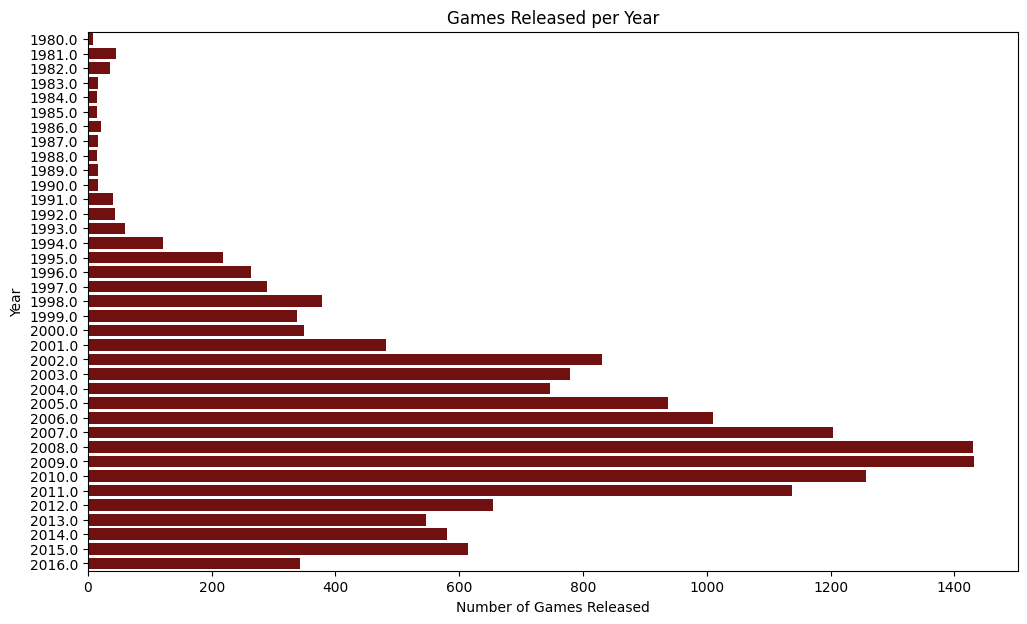

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

# Setting parameters for plotting the graph
fig = sns.barplot(y=games_per_year.year,
                 x=games_per_year.games_number,
                 orient='h',
                 color='maroon'
                 );

plt.xlabel('Number of Games Released')
plt.ylabel('Year')
plt.title('Games Released per Year')

Dapat dilihat bahwa perilisan game mencapai puncaknya pada tahun 2009 yaitu sebanyak 1431 judul

Mari kita lihat genre apa yang populer di tahun 2009 berdasarkan hasil penjualan secara global

Text(0.5, 1.0, 'Most Popular Genres in 2009')

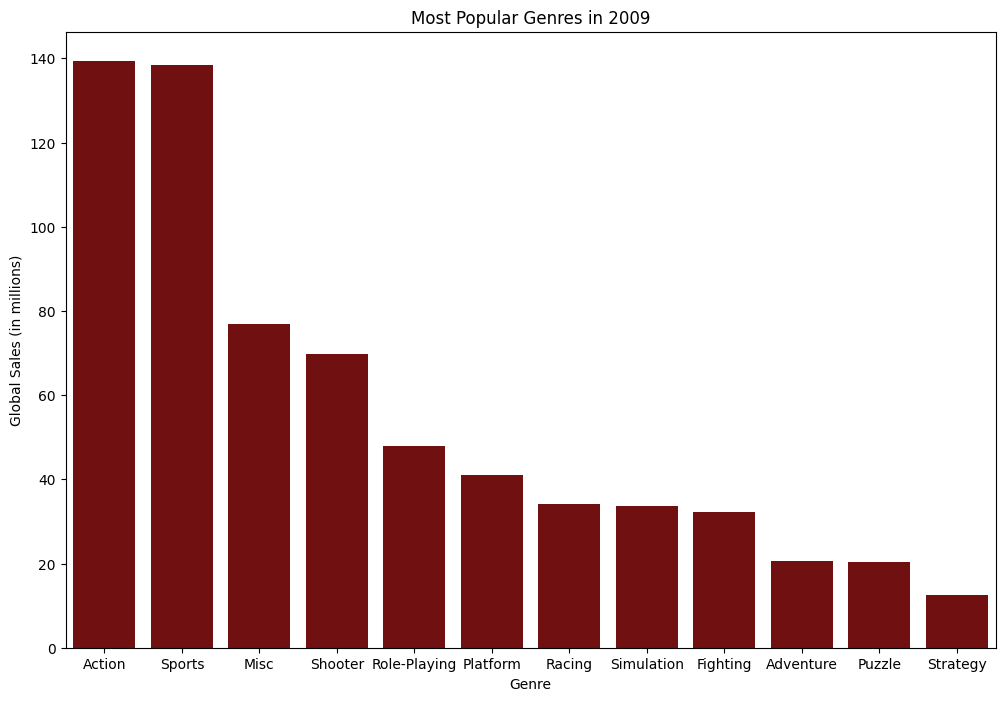

In [51]:
games_2009 = games[games['year'] == 2009]

genre_sales_2009 = games_2009.groupby('genre', as_index=False)['global_sales'].sum().reset_index()
genre_sales_2009 = genre_sales_2009.sort_values(by='global_sales', ascending=False)

plt.figure(figsize=(12, 8))

fig = sns.barplot(x=genre_sales_2009.genre, y=genre_sales_2009.global_sales, color='maroon')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.title('Most Popular Genres in 2009')

Genre action menjadi genre terpopuler dan memiliki penjualan paling banyak di tahun 2009 yaitu sebesar 139,36 juta USD

Mari kita lihat platform mana yang paling populer di tahun 2009

Text(0, 0.5, 'Global Sales (in millions)')

<Figure size 1200x800 with 0 Axes>

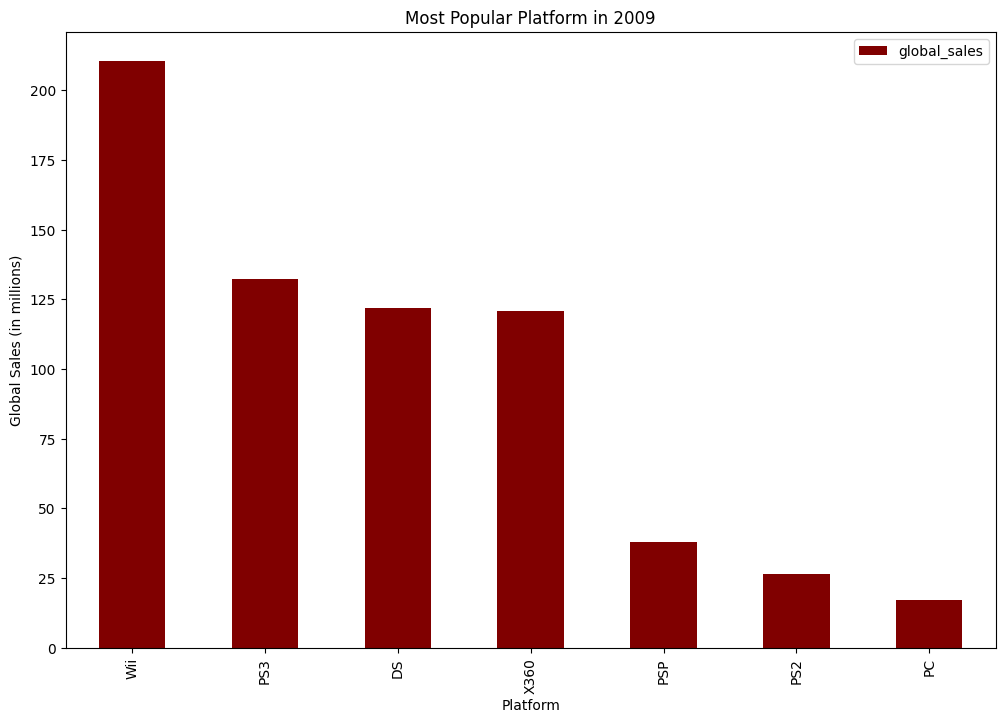

In [52]:
plt_sales_2009 = games_2009.groupby('platform', as_index=False)['global_sales'].sum()
plt_sales_2009 = plt_sales_2009.sort_values(by='global_sales', ascending=False)

plt.figure(figsize=(12, 8))

plt_sales_2009.plot(x='platform',
               y='global_sales',
               kind='bar',
               figsize=(12, 8),
               title='Most Popular Platform in 2009',
               color='maroon');

plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')

Paltform Wii dari Nintendo menjadi yang terpopuler dan memiliki penjualan terbanyak pada tahun 2009 yaitu 210.44 juta USD

Setelah itu mari kita lihat penjualan games secara global setiap tahunnya

In [68]:
games_sales = games.groupby('year', as_index=False) \
                .agg({'global_sales' : 'sum'}) \
                .sort_values('global_sales', ascending=False)

Text(0.5, 1.0, 'Global Sales per Year')

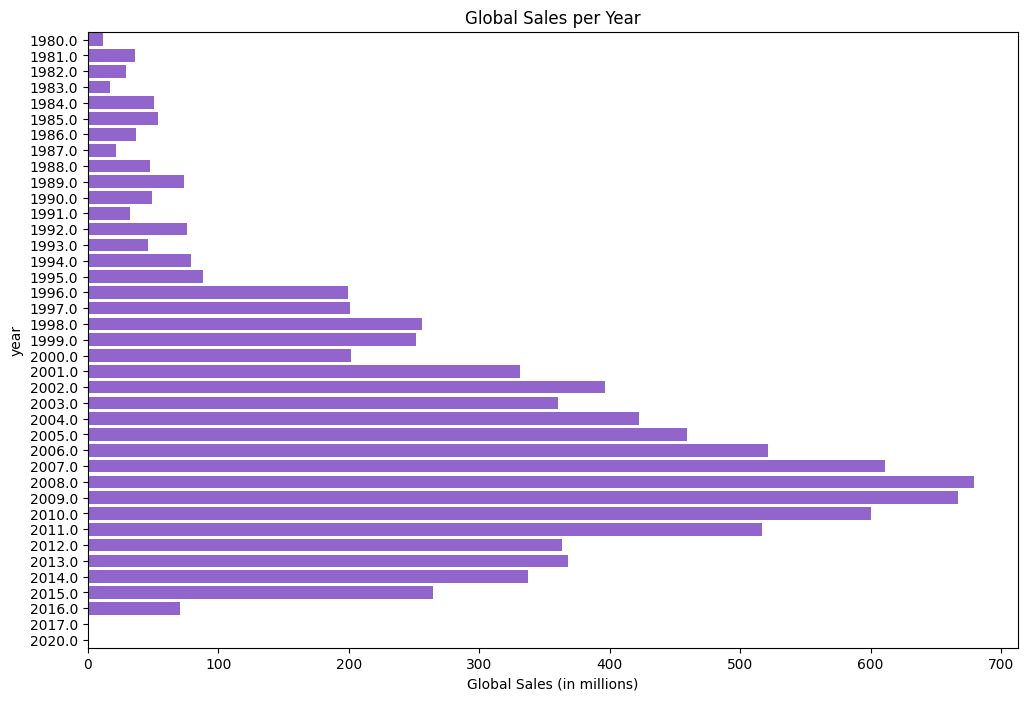

In [54]:
plt.figure(figsize=(12, 8))

fig = sns.barplot(y=games_sales.year,
                  x=games_sales.global_sales,
                  orient='h',
                  color='#9054DE');

plt.xlabel('Global Sales (in millions)')
plt.title('Global Sales per Year')

Tahun 2008 menjadi puncak penjualan global dengan total sebesar 678.93 juta USD

Penjualan global berdasarkan platfom

In [72]:
plt_sales = games.groupby('platform', as_index=False) \
            .agg({'global_sales' : 'sum'}) \
            .sort_values('global_sales', ascending=False);

Text(0, 0.5, 'Global Sales (in millions)')

<Figure size 1200x800 with 0 Axes>

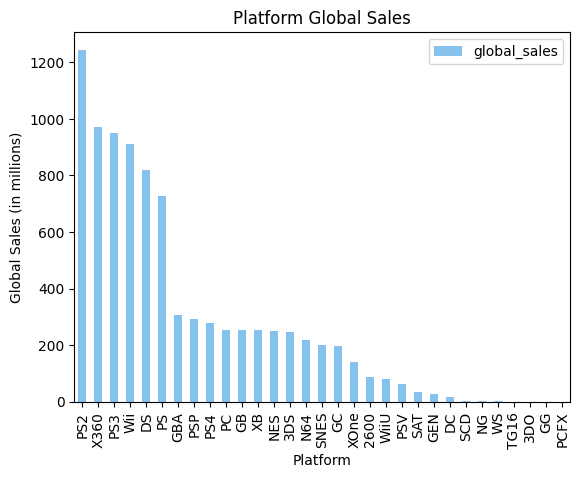

In [56]:
plt.figure(figsize=(12, 8))

plt_sales.plot(x='platform',
               y='global_sales',
               kind='bar',
               title='Platform Global Sales',
               color='#85C2ED');

plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')

PS2 manjadi platform dengan penjualan global tertinggi yaitu 1244.16 juta USD

Karena beberapa platform memiliki penjualan yang cenderung sangat rendah maka akan dikelompokkan berdasarkan hasil penjualan yang melebihi nilai tengah dari seluruh platform

In [57]:
platforms_above_median = []

for row in plt_sales.itertuples():
    if row.global_sales > plt_sales.global_sales.median():
        platforms_above_median.append(row.platform)

platforms_above_median

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'GBA',
 'PSP',
 'PS4',
 'PC',
 'GB',
 'XB',
 'NES',
 '3DS',
 'N64']

Berikut adalah dinamika penjualan global dikelompokkan berdasarkan platform dan tahun

In [58]:
plt_sales_year = games.query('platform in @platforms_above_median') \
    .groupby(['year', 'platform'], as_index=False) \
    .agg({'global_sales': 'sum'}) \
    .sort_values('year', ascending=True)

Text(0.5, 1.0, 'Sales Dynamics by Platform Whose Sales Above The Median by Year')

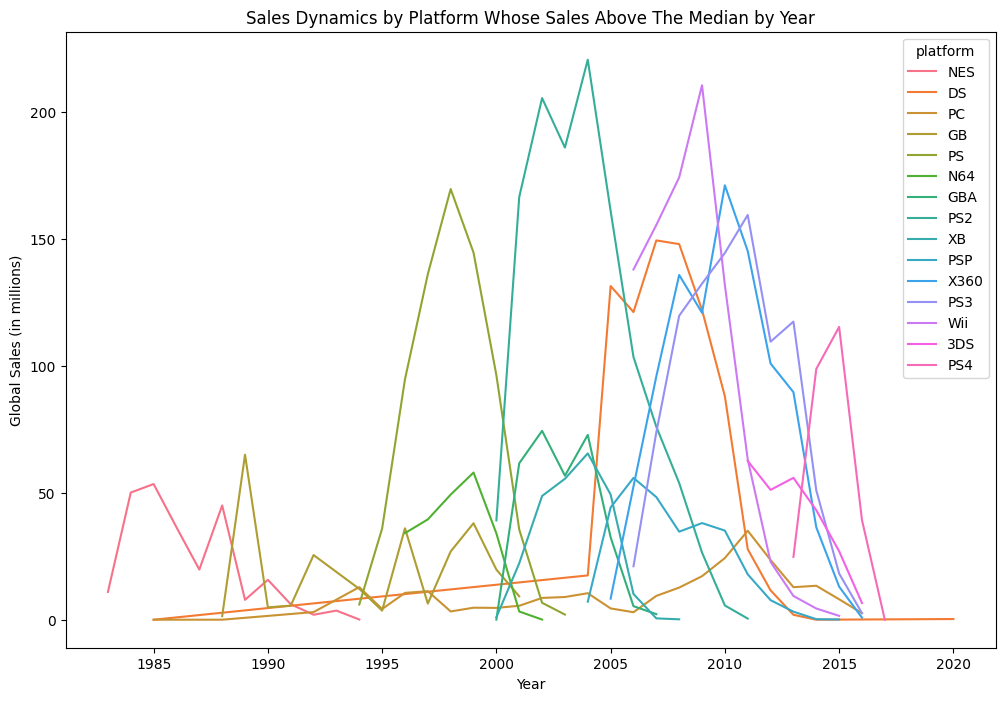

In [59]:
plt.figure(figsize=(12, 8))

sns.lineplot(x=plt_sales_year.year,
             y=plt_sales_year.global_sales,
             hue=plt_sales_year.platform);

plt.ylabel('Global Sales (in millions)')
plt.xlabel('Year')
plt.title('Sales Dynamics by Platform Whose Sales Above The Median by Year')

Yang terakhir adalah hasil penjualan global tiap genre berdasarkan region

In [60]:
import plotly.express as px

genre_sales_by_region = games.groupby('genre', as_index=False)[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

genre_sales_by_region = pd.melt(genre_sales_by_region, id_vars=['genre'],
                                value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                var_name='region', value_name='sales')


fig = px.bar(genre_sales_by_region, x='genre', y='sales', color='region',
             title='Genre Sales by Market',
             labels={'sales' : 'Sales (in millions)', 'genre' : 'Genre'},
             width=800, height=400)

fig.show()

Didapatkan hasil sebagai berikut:
- Action dan Sports menjadi genre umum yang paling laris dan terkenal di 3 region yaitu North America (NA), juga Europe (EU) serta region lain selain 3 region major yang sudah disebutkan
- Role-Playing dan Sports menjadi genre yang paling laris dan terkenal di region Japan (JP)